# BIOFUEL PRODUCTION PREDICTION

Using multi-linear regression

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('biofuel_data.csv')

# Check the data types of each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cellulose           58 non-null     float64
 1   Hemicellulose       58 non-null     float64
 2   Lignin              58 non-null     float64
 3   Ash                 58 non-null     float64
 4   Extractives         58 non-null     float64
 5   Species             58 non-null     object 
 6   Biofuel Production  58 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.3+ KB
None


In [3]:
data.describe()

,Cellulose,Hemicellulose,Lignin,Ash,Extractives,Biofuel Production
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,34.710345,20.918966,23.718966,4.663793,3.048276,0.709828
std,2.440283,1.809183,1.317821,0.483299,0.340403,0.034002
min,30.800000,18.400000,21.500000,3.900000,2.100000,0.640000
25%,32.625000,19.100000,22.925000,4.225000,2.900000,0.682500
50%,34.700000,20.800000,23.650000,4.700000,3.100000,0.705000
75%,36.775000,22.275000,24.875000,5.075000,3.200000,0.737500
max,38.500000,24.500000,26.200000,5.600000,3.700000,0.780000


In [ ]:
# Convert the 'Species' column to a numeric format
data['Species'] = pd.to_numeric(data['Species'], errors='coerce')
# Split the dataset into features (X) and target variable (y)
X = data.drop('Biofuel Production', axis=1)
y = data['Biofuel Production']

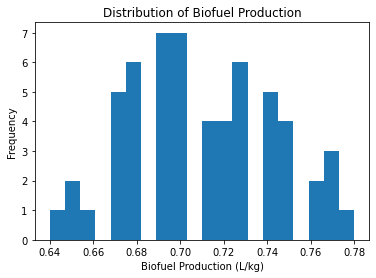

In [ ]:
plt.hist(y, bins=20)
plt.xlabel('Biofuel Production (L/kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Biofuel Production')
plt.show()

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Impute the missing values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
score = model.score(X_test, y_test)
print('Model score:', score)

Model score: 0.5982941980401164


In [ ]:
cellulose = float(input('Enter the cellulose amount: '))
hemicellulose = float(input('Enter the hemicellulose amount: '))
lignin = float(input('Enter the lignin amount: '))
ash = float(input('Enter the ash amount: '))
extractives = float(input('Enter the extractives amount: '))
species = input('Enter the species: ')
species_onehot = pd.get_dummies([species], prefix='species', drop_first=True).values.tolist()[0]

# Combine the numerical and categorical features into a single input vector
X_new = [[cellulose, hemicellulose, lignin, ash, extractives] + species_onehot]

# Make a prediction
y_pred = model.predict(X_new)

print('Predicted biofuel production rate:', y_pred[0])

Enter the cellulose amount: 33.8
Enter the hemicellulose amount: 22.6
Enter the lignin amount: 24.7
Enter the ash amount: 4.4
Enter the extractives amount: 3.1
Enter the species: A
Predicted biofuel production rate: 0.6829096813187411


# using random forest regressor


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

In [ ]:
# Load the data
data = pd.read_csv('biofuel_data.csv')

# Split the data into input features (X) and target variable (y)
X = data.drop(['Biofuel Production'], axis=1)
y = data['Biofuel Production']

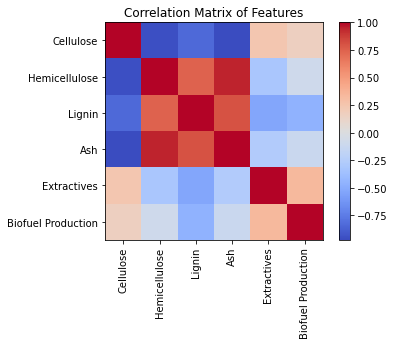

In [ ]:
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['Cellulose', 'Hemicellulose', 'Lignin', 'Ash', 'Extractives']),
    ('cat', cat_pipeline, ['Species'])
])

In [ ]:
# Define the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine the preprocessing pipeline and model in a single pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', rf)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 6.616166666666488e-05
Enter the input values for predicting Biofuel Production (L/kg):


In [ ]:
cellulose = float(input('Cellulose: '))
hemicellulose = float(input('Hemicellulose: '))
lignin = float(input('Lignin: '))
ash = float(input('Ash: '))
extractives = float(input('Extractives: '))
species = input('Species (A/B/C/D/E): ')

user_input = pd.DataFrame({'Cellulose': [cellulose], 'Hemicellulose': [hemicellulose], 'Lignin': [lignin], 'Ash': [ash], 'Extractives': [extractives], 'Species': [species]})

# Make prediction on user input
user_prediction = pipeline.predict(user_input)

print('Predicted Biofuel Production (L/kg):', user_prediction[0])

Cellulose: 33.3
Hemicellulose: 28.2
Lignin: 24.
Ash: 3.3
Extractives: 4.2
Species (A/B/C/D/E): B
Predicted Biofuel Production (L/kg): 0.7070000000000001


In [ ]:
joblib.dump(model, 'biofuel_model.pkl')

['biofuel_model.pkl']

In [ ]:
model = joblib.load('biofuel_model.pkl')

In [ ]:
import joblib

# Load the saved model
model = joblib.load('biofuel_model.pkl')

# Get user input and make prediction
print('Enter the input values for predicting Biofuel Production (L/kg):')
cellulose = float(input('Cellulose: '))
hemicellulose = float(input('Hemicellulose: '))
lignin = float(input('Lignin: '))
ash = float(input('Ash: '))
extractives = float(input('Extractives: '))
species = input('Species (A/B/C/D/E): ')

# create a new DataFrame with correct column names
user_input = pd.DataFrame({'Cellulose': [cellulose], 'Hemicellulose': [hemicellulose], 'Lignin': [lignin], 'Ash': [ash], 'Extractives': [extractives], 'Species_A': [0], 'Species_A1': [0], 'Species_B': [0], 'Species_B1': [0], 'Species_C': [0], 'Species_C1': [0], 'Species_D': [0], 'Species_D1': [0], 'Species_E': [0], 'Species_E1': [0]})

# set the value for the correct Species column based on the user input
if species == 'A':
    user_input['Species_A'] = 1
elif species == 'A1':
    user_input['Species_A1'] = 1
elif species == 'B':
    user_input['Species_B'] = 1
elif species == 'B1':
    user_input['Species_B1'] = 1
elif species == 'C':
    user_input['Species_C'] = 1
elif species == 'C1':
    user_input['Species_C1'] = 1
elif species == 'D':
    user_input['Species_D'] = 1
elif species == 'D1':
    user_input['Species_D1'] = 1
elif species == 'E':
    user_input['Species_E'] = 1
elif species == 'E1':
    user_input['Species_E1'] = 1

# Make prediction on user input
user_prediction = model.predict(user_input)

print('Predicted Biofuel Production (L/kg):', user_prediction[0])


Enter the input values for predicting Biofuel Production (L/kg):
Cellulose: 33.4
Hemicellulose: 24.8
Lignin: 22.2
Ash: 3.3
Extractives: 4.2
Species (A/B/C/D/E): A


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
cellulose = float(input('Cellulose: '))
hemicellulose = float(input('Hemicellulose: '))
lignin = float(input('Lignin: '))
ash = float(input('Ash: '))
extractives = float(input('Extractives: '))
species = input('Species (A/B/C/D/E): ')

user_input = pd.DataFrame({'Cellulose': [cellulose], 'Hemicellulose': [hemicellulose], 'Lignin': [lignin], 'Ash': [ash], 'Extractives': [extractives], 'Species': [species]})

# Make prediction on user input
user_prediction = model.predict(user_input)

print('Predicted Biofuel Production (L/kg):', user_prediction[0])

Cellulose: 33.3
Hemicellulose: 28.3
Lignin: 24.3
Ash: 4.2
Extractives: 3.3
Species (A/B/C/D/E): B


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Load the data
data = pd.read_csv('biofuel_data.csv')

# Split the data into input features (X) and target variable (y)
X = data.drop(['Biofuel Production'], axis=1)
y = data['Biofuel Production']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['Cellulose', 'Hemicellulose', 'Lignin', 'Ash', 'Extractives']),
    ('cat', cat_pipeline, ['Species'])
])

# Define the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Combine the preprocessing pipeline and model in a single pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', rf)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Save the trained model to a file
joblib.dump(pipeline, 'rf_regressor.pkl')

# Load the trained model from the file
pipeline = joblib.load('rf_regressor.pkl')

# Get user input and make prediction
print('Enter the input values for predicting Biofuel Production (L/kg):')
cellulose = float(input('Cellulose: '))
hemicellulose = float(input('Hemicellulose: '))
lignin = float(input('Lignin: '))
ash = float(input('Ash: '))
extractives = float(input('Extractives: '))
species = input('Species (A/B/C/D/E): ')

user_input = pd.DataFrame({'Cellulose': [cellulose], 'Hemicellulose': [hemicellulose], 'Lignin': [lignin], 'Ash': [ash], 'Extractives': [extractives], 'Species': [species]})

# Make prediction on user input
user_prediction = pipeline.predict(user_input)

print('Predicted Biofuel Production (L/kg):', user_prediction[0])


Mean Squared Error: 6.616166666666488e-05
Enter the input values for predicting Biofuel Production (L/kg):
Cellulose: 33.8
Hemicellulose: 22.3
Lignin: 21.4
Ash: 3.3
Extractives: 4.2
Species (A/B/C/D/E): A
Predicted Biofuel Production (L/kg): 0.7202000000000003


In [ ]:
joblib.dump(pipeline, 'rf_regressor.pkl')

# Load the trained model from the file
pipeline = joblib.load('rf_regressor.pkl')

# Get user input and make prediction
print('Enter the input values for predicting Biofuel Production (L/kg):')
cellulose = float(input('Cellulose: '))
hemicellulose = float(input('Hemicellulose: '))
lignin = float(input('Lignin: '))
ash = float(input('Ash: '))
extractives = float(input('Extractives: '))
species = input('Species (A/B/C/D/E): ')

user_input = pd.DataFrame({'Cellulose': [cellulose], 'Hemicellulose': [hemicellulose], 'Lignin': [lignin], 'Ash': [ash], 'Extractives': [extractives], 'Species': [species]})

# Make prediction on user input
user_prediction = pipeline.predict(user_input)

print('Predicted Biofuel Production (L/kg):', user_prediction[0])

Enter the input values for predicting Biofuel Production (L/kg):
Cellulose: 33.3
Hemicellulose: 24.3
Lignin: 22.2
Ash: 3.2
Extractives: 4.3
Species (A/B/C/D/E): B
Predicted Biofuel Production (L/kg): 0.7262999999999998
